# **Caso Práctico: Segmentación de Clientes Basado en Aprendizaje No Supervisado**
El documento corresponde a un caso práctico que puede ser utilizado como guía para aplicar Clustering como tpecnica de segmentación de clientes.

### **Contexto empresarial**

La segmentación de clientes mediante técnicas de clustering representa una herramienta fundamental en la estrategia empresarial moderna, transformando la manera en que las organizaciones comprenden y se relacionan con su base de clientes. En el actual entorno empresarial, caracterizado por una creciente competencia y la disponibilidad masiva de datos, las empresas necesitan superar el enfoque tradicional de "talla única" en sus estrategias de marketing y servicio al cliente. El clustering emerge como una solución analítica avanzada que permite identificar patrones naturales y grupos coherentes dentro de la base de clientes, facilitando la personalización y optimización de las estrategias comerciales. Esta técnica permite a las empresas descubrir segmentos de clientes que comparten características similares en términos de comportamiento de compra, preferencias, patrones de uso de productos o servicios, y otras variables relevantes para el negocio.

El procedimiento tradicional para realizar una segmentación de clientes basada en clustering es:

 1. Preparación y análisis exploratorio de datos
 2. Preprocesamiento y reducción de dimensionalidad con PCA
 3. Determinación del número óptimo de clusters
 4. Aplicación de diferentes modelos de clustering:
    - K-means
    - DBSCAN
    - Hierarchical Clustering
 5. Comparación de resultados y conclusiones

### **Descripción de los datos**

Los datos corresponden a 18 variables:

- **CUST_ID**: identificador único del cliente.
- **BALANCE**: saldo disponible en la tarjeta.
- **BALANCE_FREQUENCY**: que tanto varia el saldo disponible de la tarjeta (0 = no frecuentemente, 1 = frecuentemente).
- **PURCHASES**: valor de las compras hechas con la tarjeta.
- **ONEOFF_PURCHASES**: valor máximo de compras realizadas sin diferido.
- **INSTALLMENTS_PURCHASES**: valor de compras diferdas.
- **CASH_ADVANCE**: valor de avances de efectivo realizados.
- **PURCHASES_FREQUENCY**: que tan frecuente se realizan compras.
- **ONEOFFPURCHASESFREQUENCY**: que tan frecuente se realizan compras sin diferidos.
- **PURCHASESINSTALLMENTSFREQUENCY**: que tan frecuente se realizan compras con diferidos.
- **CASHADVANCEFREQUENCY**: que tan frecuente se realizan avances de efectivo.
- **CASHADVANCETRX**: numero de avances de efectivo realizados.
- **PURCHASES_TRX**: numero de compras realizadas.
- **CREDIT_LIMIT**: monto límite de la tarjeta de crédito.
- **PAYMENTS**: monto del pago realizado por el cliente.
- **MINIMUM_PAYMENTS**: monto de pagos minimos realizados por el cliente.
- **PRCFULLPAYMENT**: porcentaje del pago total requerido realizado por el cliente.
- **TENURE**: nivel de uso de la tarjeta de credito.

## **1. Configuración Inicial y Carga de Datos**
Primero, configuraremos nuestro entorno de análisis e importaremos las bibliotecas necesarias. Tambien cargaremos los datos.

In [ ]:
# Importar librerias
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import os
import plotly.express as px

In [ ]:
# Carga de datos
path = kagglehub.dataset_download("arjunbhasin2013/ccdata")

# Datos de inicio y fin del viaje
df = pd.read_csv(path + "/" + os.listdir(path)[0])
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## **2. Análisis Exploratorio de Datos**
Analizaremos la información inherente al dataset para entender:
- Tipos de datos
- Valores faltantes
- Reconocer las distribuciones de las variables
- Analizar la correlación que pueda existir entre variables

In [ ]:
# Información básica del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

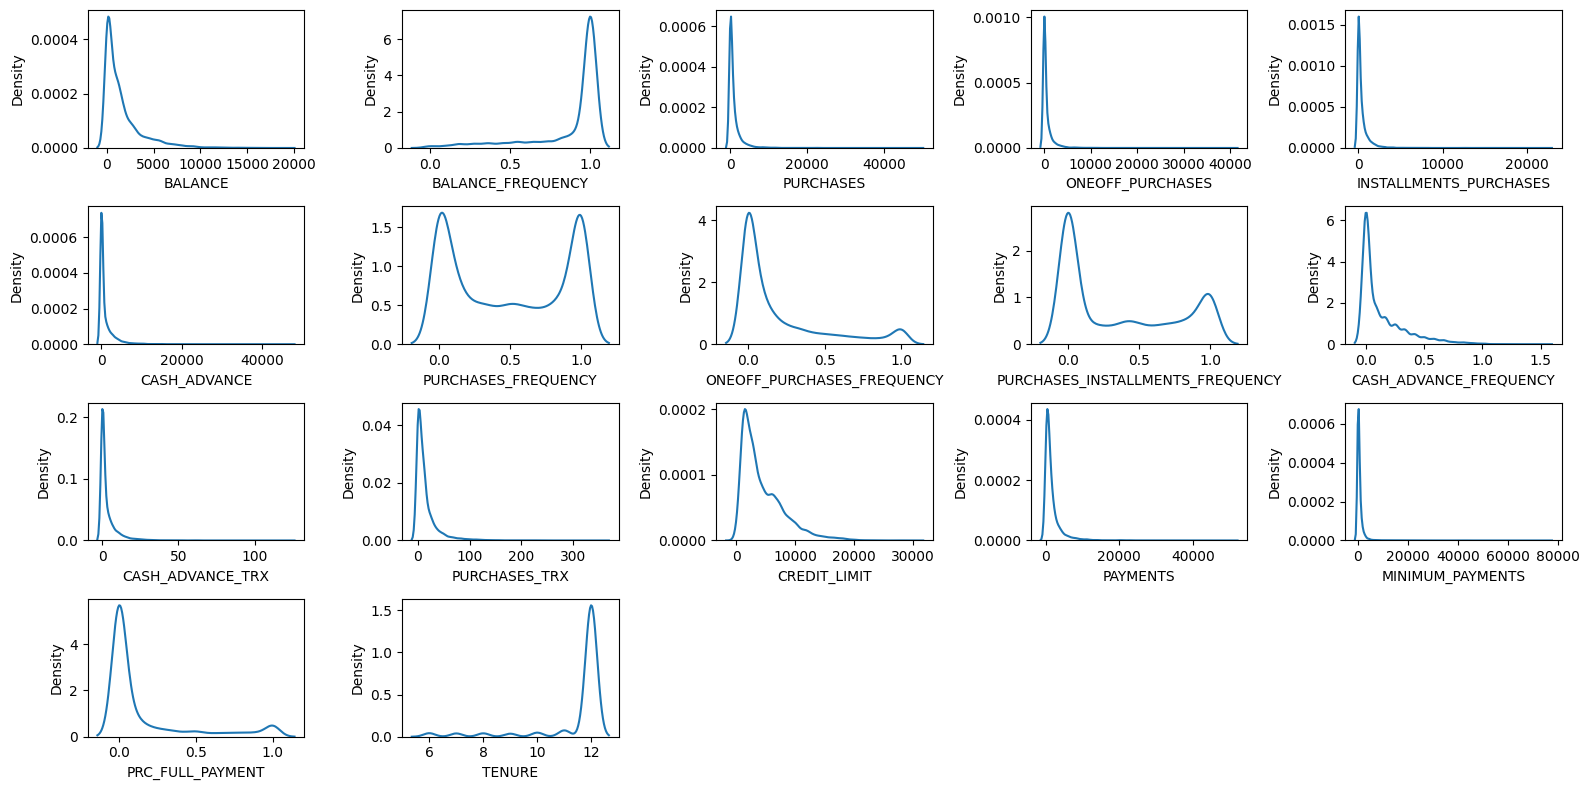

In [ ]:
# Visualización de distribuciones
plt.figure(figsize=(16, 8))
for i, column in enumerate(df.columns, 0):
    if df[column].dtype != 'object':
      plt.subplot(4, 5, i)
      sns.kdeplot(df[column])
plt.tight_layout()
plt.show()

La imagen muestra 17 distribuciones de densidad para diferentes variables financieras.

- BALANCE: Saldo en la cuenta, muy sesgado hacia valores bajos (0-5000).
- BALANCE_FREQUENCY: Frecuencia de actualización de saldo, con alta concentración cerca de 1.0.
- PURCHASES: Compras totales, muy sesgado hacia valores bajos.
- ONEOFF_PURCHASES: Compras únicas, distribución similar a compras generales.
- INSTALLMENTS_PURCHASES: Compras a plazos, también concentradas en valores bajos.
- CASH_ADVANCE: Adelantos en efectivo, fuertemente sesgado hacia valores mínimos.
- PURCHASES_FREQUENCY: Frecuencia de compras, distribución bimodal con picos en ~0.1 y ~1.0.
- ONEOFF_PURCHASES_FREQUENCY: Frecuencia de compras únicas, sesgada hacia valores bajos con ligero pico en 1.0.
- PURCHASES_INSTALLMENTS_FREQUENCY: Frecuencia de compras a plazos, bimodal con picos en ~0.1 y ~1.0.
- CASH_ADVANCE_FREQUENCY: Frecuencia de adelantos en efectivo, muy sesgada hacia valores bajos.
- CASH_ADVANCE_TRX: Número de transacciones de adelantos, extremadamente sesgado hacia valores bajos.
- PURCHASES_TRX: Número de transacciones de compras, mayoría cerca de cero.
- CREDIT_LIMIT: Límite de crédito, distribución con cola larga.
- PAYMENTS: Pagos realizados, sesgados hacia valores bajos.
- MINIMUM_PAYMENTS: Pagos mínimos, distribución similar a pagos generales.
- PRC_FULL_PAYMENT: Porcentaje de pago completo, bimodal con picos en ~0.0 y ~1.0.
- TENURE: Antigüedad del cliente, concentrada alrededor de 12 meses.

**Insights relevantes**

- Comportamiento bimodal de pagos: Los clientes tienden a dividirse en dos grupos principales: los que pagan el mínimo (cerca de 0% en PRC_FULL_PAYMENT) y los que pagan completamente sus deudas (cerca de 100%).
- Alta concentración de frecuencia de saldo: La mayoría de los clientes tienen su BALANCE_FREQUENCY cerca de 1.0, lo que sugiere actualizaciones frecuentes de saldo, indicando uso activo de las cuentas.
- Comportamiento de compras dividido: Las distribuciones bimodales de PURCHASES_FREQUENCY y PURCHASES_INSTALLMENTS_FREQUENCY indican dos tipos de clientes: usuarios ocasionales (cerca de 0) y usuarios frecuentes (cerca de 1).
- Baja utilización de adelantos en efectivo: La mayoría de los clientes tienen valores muy bajos en CASH_ADVANCE, lo que sugiere que esta característica es menos utilizada que las compras regulares.
- Antigüedad de clientes homogénea: La concentración de TENURE alrededor de 12 meses sugiere que la mayoría de los clientes tienen aproximadamente un año con el servicio, posiblemente indicando una campaña de adquisición específica o un producto relativamente nuevo.
- Oportunidades de segmentación: Estos datos podrían utilizarse para segmentar clientes en grupos como "pagadores completos vs. mínimos", "usuarios de compras únicas vs. a plazos", o "usuarios frecuentes vs. ocasionales".

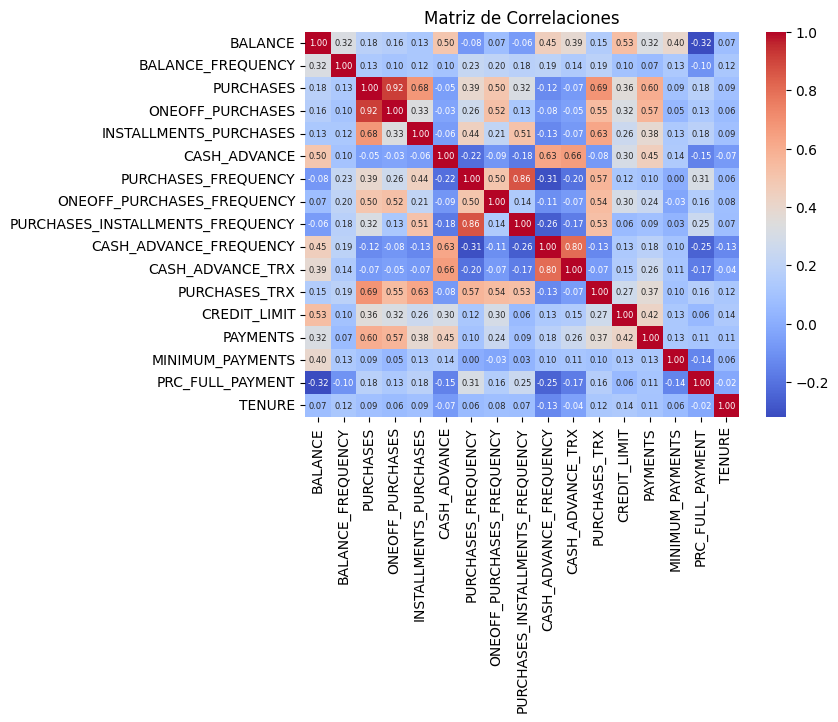

In [ ]:
# Matriz de correlaciones
correlation_matrix = df.select_dtypes(exclude=[object]).corr()
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 6})
plt.title('Matriz de Correlaciones')
plt.show()

Esta matriz de correlaciones (o heatmap) representa visualmente la fuerza y dirección de las relaciones lineales entre las 17 variables financieras. Los valores varían de -1 (correlación negativa perfecta, en azul oscuro) a 1 (correlación positiva perfecta, en rojo oscuro), donde 0 (blanco/celeste claro) indica ausencia de correlación lineal.

**Insights relevantes**

- Existe una correlación muy alta (0.92) entre PURCHASES y ONEOFF_PURCHASES, lo que indica que las compras únicas representan una proporción significativa del total de compras para la mayoría de los clientes.
- PURCHASES_FREQUENCY y ONEOFF_PURCHASES_FREQUENCY muestran una correlación fuerte (0.50), al igual que PURCHASES_FREQUENCY y PURCHASES_INSTALLMENTS_FREQUENCY (0.86), sugiriendo que los clientes que hacen compras frecuentemente tienden a utilizar ambas modalidades (únicas y a plazos).
- Los adelantos en efectivo (CASH_ADVANCE) tienen una correlación positiva fuerte con CASH_ADVANCE_TRX (0.66) y CASH_ADVANCE_FREQUENCY (0.63), como era de esperar, pero interesantemente muestran una correlación negativa moderada con PRC_FULL_PAYMENT (-0.15), lo que sugiere que los clientes que usan adelantos tienden a no pagar sus saldos completos.
- PAYMENTS y CREDIT_LIMIT tienen una correlación positiva considerable (0.42), indicando que clientes con mayores límites de crédito tienden a realizar pagos más grandes.
- BALANCE tiene una correlación negativa (-0.32) con PRC_FULL_PAYMENT, lo que indica lógicamente que clientes con saldos más altos tienden a pagar un menor porcentaje de su deuda total.
- La antigüedad(TENURE) del cliente tiene correlaciones generalmente bajas con la mayoría de las variables, con excepción de una correlación negativa leve con PRC_FULL_PAYMENT (-0.02), sugiriendo que hay poca relación entre el tiempo como cliente y el comportamiento de pago o uso.
- Las variables de compras (PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES) están fuertemente correlacionadas entre sí. Las variables de frecuencia (todas las que terminan en _FREQUENCY) forman otro grupo con fuertes correlaciones internas. CASH_ADVANCE y sus variables derivadas forman un tercer grupo distintivo.

In [ ]:
# Obtener pares de columnas con correlación mayor a 0.5
threshold = 0.5
correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            correlated_pairs.append((colname1, colname2, correlation_matrix.iloc[i, j]))

# Mostrar pares de columnas con alta correlación
print(f"Pares de columnas con correlación mayor a {threshold}:")
for col1, col2, corr_value in correlated_pairs:
    print(f"{col1} - {col2}: {corr_value:.2f}")

Pares de columnas con correlación mayor a 0.5:
BALANCE - CREDIT_LIMIT: 0.53
PURCHASES - ONEOFF_PURCHASES: 0.92
PURCHASES - INSTALLMENTS_PURCHASES: 0.68
PURCHASES - PURCHASES_TRX: 0.69
PURCHASES - PAYMENTS: 0.60
ONEOFF_PURCHASES - ONEOFF_PURCHASES_FREQUENCY: 0.52
ONEOFF_PURCHASES - PURCHASES_TRX: 0.55
ONEOFF_PURCHASES - PAYMENTS: 0.57
INSTALLMENTS_PURCHASES - PURCHASES_INSTALLMENTS_FREQUENCY: 0.51
INSTALLMENTS_PURCHASES - PURCHASES_TRX: 0.63
CASH_ADVANCE - CASH_ADVANCE_FREQUENCY: 0.63
CASH_ADVANCE - CASH_ADVANCE_TRX: 0.66
PURCHASES_FREQUENCY - ONEOFF_PURCHASES_FREQUENCY: 0.50
PURCHASES_FREQUENCY - PURCHASES_INSTALLMENTS_FREQUENCY: 0.86
PURCHASES_FREQUENCY - PURCHASES_TRX: 0.57
ONEOFF_PURCHASES_FREQUENCY - PURCHASES_TRX: 0.54
PURCHASES_INSTALLMENTS_FREQUENCY - PURCHASES_TRX: 0.53
CASH_ADVANCE_FREQUENCY - CASH_ADVANCE_TRX: 0.80


## **3. Preprocesamiento y PCA**

En este paso imputaremos los valores nulos, aplicaremos reducción dimensional, y estandarización y escalamiento a los datos.

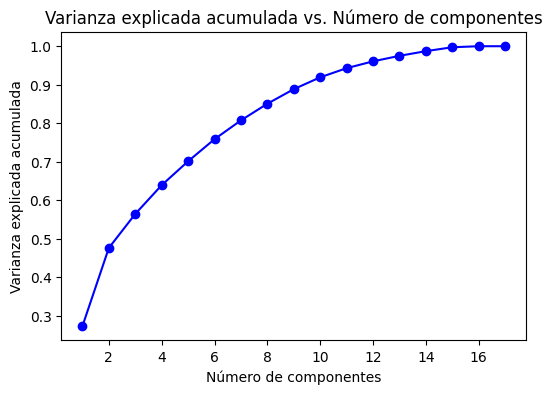

In [ ]:
# Solo considerar columnas con las variables que ingresan al modelos
df = df.select_dtypes(exclude=[object])

# Imputar valores faltantes
df = df.fillna(0)

# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Aplicar PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Varianza explicada
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada vs. Número de componentes')
plt.show()

El gráfico representa la relación entre el número de componentes principales (eje X, que va de 1 a 17) y la varianza explicada acumulada (eje Y, que va de 0 a 1 o de 0% a 100%). La línea azul muestra cómo aumenta la varianza explicada a medida que se añaden más componentes al modelo.

**Insights relevantes**

- El primer componente explica aproximadamente el 27-28% de la varianza total, y con solo 3 componentes ya se alcanza cerca del 50% de la varianza. Para alcanzar un 80% de la varianza explicada necesitamos 7 componentes.
- El gráfico sugiere que se podría reducir el conjunto de datos de 17 variables originales a 7 componentes principales manteniendo la mayor parte de la información (aproximadamente 80%), lo que representa una reducción dimensional efectiva.

In [ ]:
# Seleccionar componentes que explican el 80% de la varianza
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.8) + 1
print(f"Número de componentes que explican el 80% de la varianza: {n_components}")

# Reducir dimensionalidad
pca = PCA(n_components=n_components)
df_pca_reduced = pca.fit_transform(df_scaled)

Número de componentes que explican el 70% de la varianza: 7


## **4. Determinación del Número Óptimo de Clusters**
En la práctica es adecuado determinar el número óptimo de clusters utilizando los métodos del codo y del score de silueta.

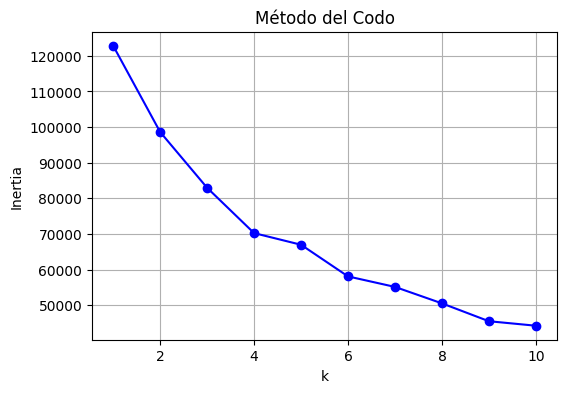

In [ ]:
# Método del codo
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca_reduced)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertias, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

El eje X representa "k", que indica el número de clusters o grupos, variando de 1 a 10.
El eje Y representa "inercia", una medida que cuantifica la suma de las distancias al cuadrado de cada punto al centroide de su cluster asignado.
La línea azul muestra cómo disminuye la inercia conforme aumenta el número de clusters.

**Insights relevantes**

- Comportamiento de la inercia: Como es de esperar, la inercia disminuye a medida que aumenta el número de clusters, ya que los puntos tienden a estar más cerca de sus respectivos centroides cuando hay más grupos.
- Se observa un "codo" o punto de inflexión alrededor de k=4, donde la pendiente de la curva cambia significativamente. Antes de este punto, la inercia disminuye rápidamente; después, la disminución es más gradual.
- Siguiendo el principio del método del codo, k=4 parece ser un valor óptimo para el número de clusters. Este es el punto donde añadir más clusters proporciona un beneficio marginal menor en términos de reducción de la inercia.
- Elegir k=4 representaría un buen equilibrio entre la complejidad del modelo (número de clusters) y la calidad del agrupamiento (inercia baja).
- Considerando las imágenes previas de datos financieros, estos 4 clusters probablemente representan diferentes perfiles de comportamiento de clientes de tarjetas de crédito, como:

  - Clientes que pagan su saldo completo regularmente
  - Clientes que utilizan principalmente compras únicas
  - Clientes que prefieren compras a plazos
  - Clientes que recurren frecuentemente a adelantos en efectivo

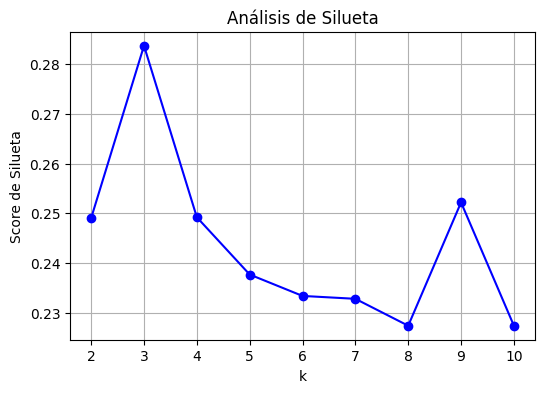

In [ ]:
# Score de Silueta
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_pca_reduced)
    silhouette_scores.append(silhouette_score(df_pca_reduced, labels))

plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('k')
plt.ylabel('Score de Silueta')
plt.title('Análisis de Silueta')
plt.grid(True)
plt.show()

El eje X representa el número de clusters (k), variando de 2 a 10.
El eje Y muestra el "Score de Silueta", un coeficiente que mide la calidad de los clusters, con valores entre aproximadamente 0.22 y 0.285.
La línea azul muestra cómo varía el score de silueta conforme cambia el número de clusters.

**Insights relevantes**

- El score de silueta alcanza su valor máximo cuando k=3 (aproximadamente 0.285), lo que sugiere que dividir los datos en 3 clusters proporciona la mejor separación y cohesión entre grupos.
- Hay un segundo pico cuando k=9 (aproximadamente 0.252), aunque es significativamente menor que el pico principal.
- Después de k=3, se observa una tendencia general descendente hasta k=8, indicando que añadir más clusters empeora progresivamente la calidad de la agrupación.
- Interesantemente, este resultado de k=3 difiere del resultado del método del codo visto anteriormente, que sugería k=4 como número óptimo. Esta discrepancia es común en análisis de clustering y refleja que diferentes métricas evalúan distintos aspectos de la calidad del agrupamiento.
- Los valores del score de silueta (entre 0.22 y 0.285) son moderados, lo que sugiere que los clusters tienen una estructura razonable pero no excepcionalmente fuerte.

**Significado en el contexto de datos financieros**

Considerando que analizamos datos de comportamiento de tarjetas de crédito, los 3 clusters óptimos podrían representar:

- Usuarios conservadores: Clientes que pagan su saldo completo, tienen pocas compras a plazos y rara vez utilizan adelantos en efectivo.
- Usuarios moderados: Clientes que utilizan regularmente su tarjeta para compras, ocasionalmente pagan el mínimo, y a veces recurren a compras a plazos.
- Usuarios intensivos: Clientes que mantienen saldos altos, utilizan frecuentemente adelantos en efectivo, y generalmente pagan solo el mínimo.

## **5. Aplicación de Modelos de Clustering**

### **5.1. Clustering con K-means**

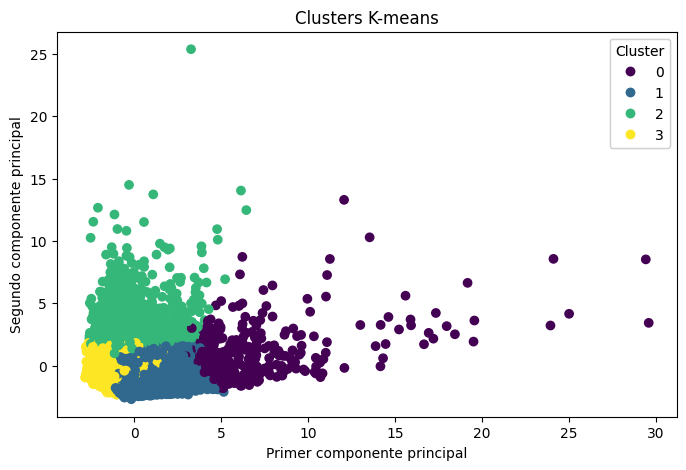

In [ ]:
# K-means
optimal_k = 4 # Basado en método del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_pca_reduced)

# Visualización utilizando los 2 primeros componentes principales
plt.figure(figsize=(8, 5))
scatter = plt.scatter(df_pca_reduced[:, 0], df_pca_reduced[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('Clusters K-means')
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
legend1 = plt.legend(handles=scatter.legend_elements()[0], labels=list(np.unique(kmeans_labels)), title="Cluster")
plt.gca().add_artist(legend1)
plt.show()

La imagen muestra un gráfico que representa la distribución de datos en un espacio bidimensional definido por los dos primeros componentes principales. El eje X representa el "Primer componente principal". El eje Y representa el "Segundo componente principal". Los datos están clasificados en 4 clusters (0, 1, 2 y 3).

**Insights relevantes**

- Los 4 clusters muestran una separación bastante definida en el espacio de componentes principales, lo que valida la elección de k=4 sugerida por el método del codo visto anteriormente.

- Características de los clusters:

  - Cluster 0 (púrpura): Se extiende hacia la derecha del gráfico con altos valores en el primer componente principal. Muestra mayor dispersión y algunos valores atípicos.
  - Cluster 1 (azul): Se concentra en la parte inferior central, con valores moderados a bajos en ambos componentes.
  - Cluster 2 (verde): Ocupa principalmente la parte superior, con valores altos en el segundo componente principal.
  - Cluster 3 (amarillo): Se sitúa en la esquina inferior izquierda, con valores bajos en ambos componentes.

- Se observan algunos puntos más alejados, especialmente en el Cluster 2 (verde), con valores extremadamente altos en el segundo componente principal (~25), que podrían representar clientes con comportamientos muy específicos o inusuales.
- El gráfico demuestra que la mayor parte de la variabilidad en los datos de las 17 variables originales puede ser capturada efectivamente en sólo 2 dimensiones (componentes principales), aunque con cierta superposición entre clusters.

In [ ]:
# Visualización utilizando los 3 primeros componentes principales
def visualize_3d(df_pca_reduced, labels):
    pc_transformation = pd.DataFrame(data=df_pca_reduced[:, :3],
                                     columns = ['PC1', 'PC2', 'PC3'])
    pc_transformation['Cluster'] = pd.Categorical(labels)
    fig = px.scatter_3d(pc_transformation, x='PC1', y='PC2', z='PC3',
                        color='Cluster')
    fig.show()

visualize_3d(df_pca_reduced, kmeans_labels)

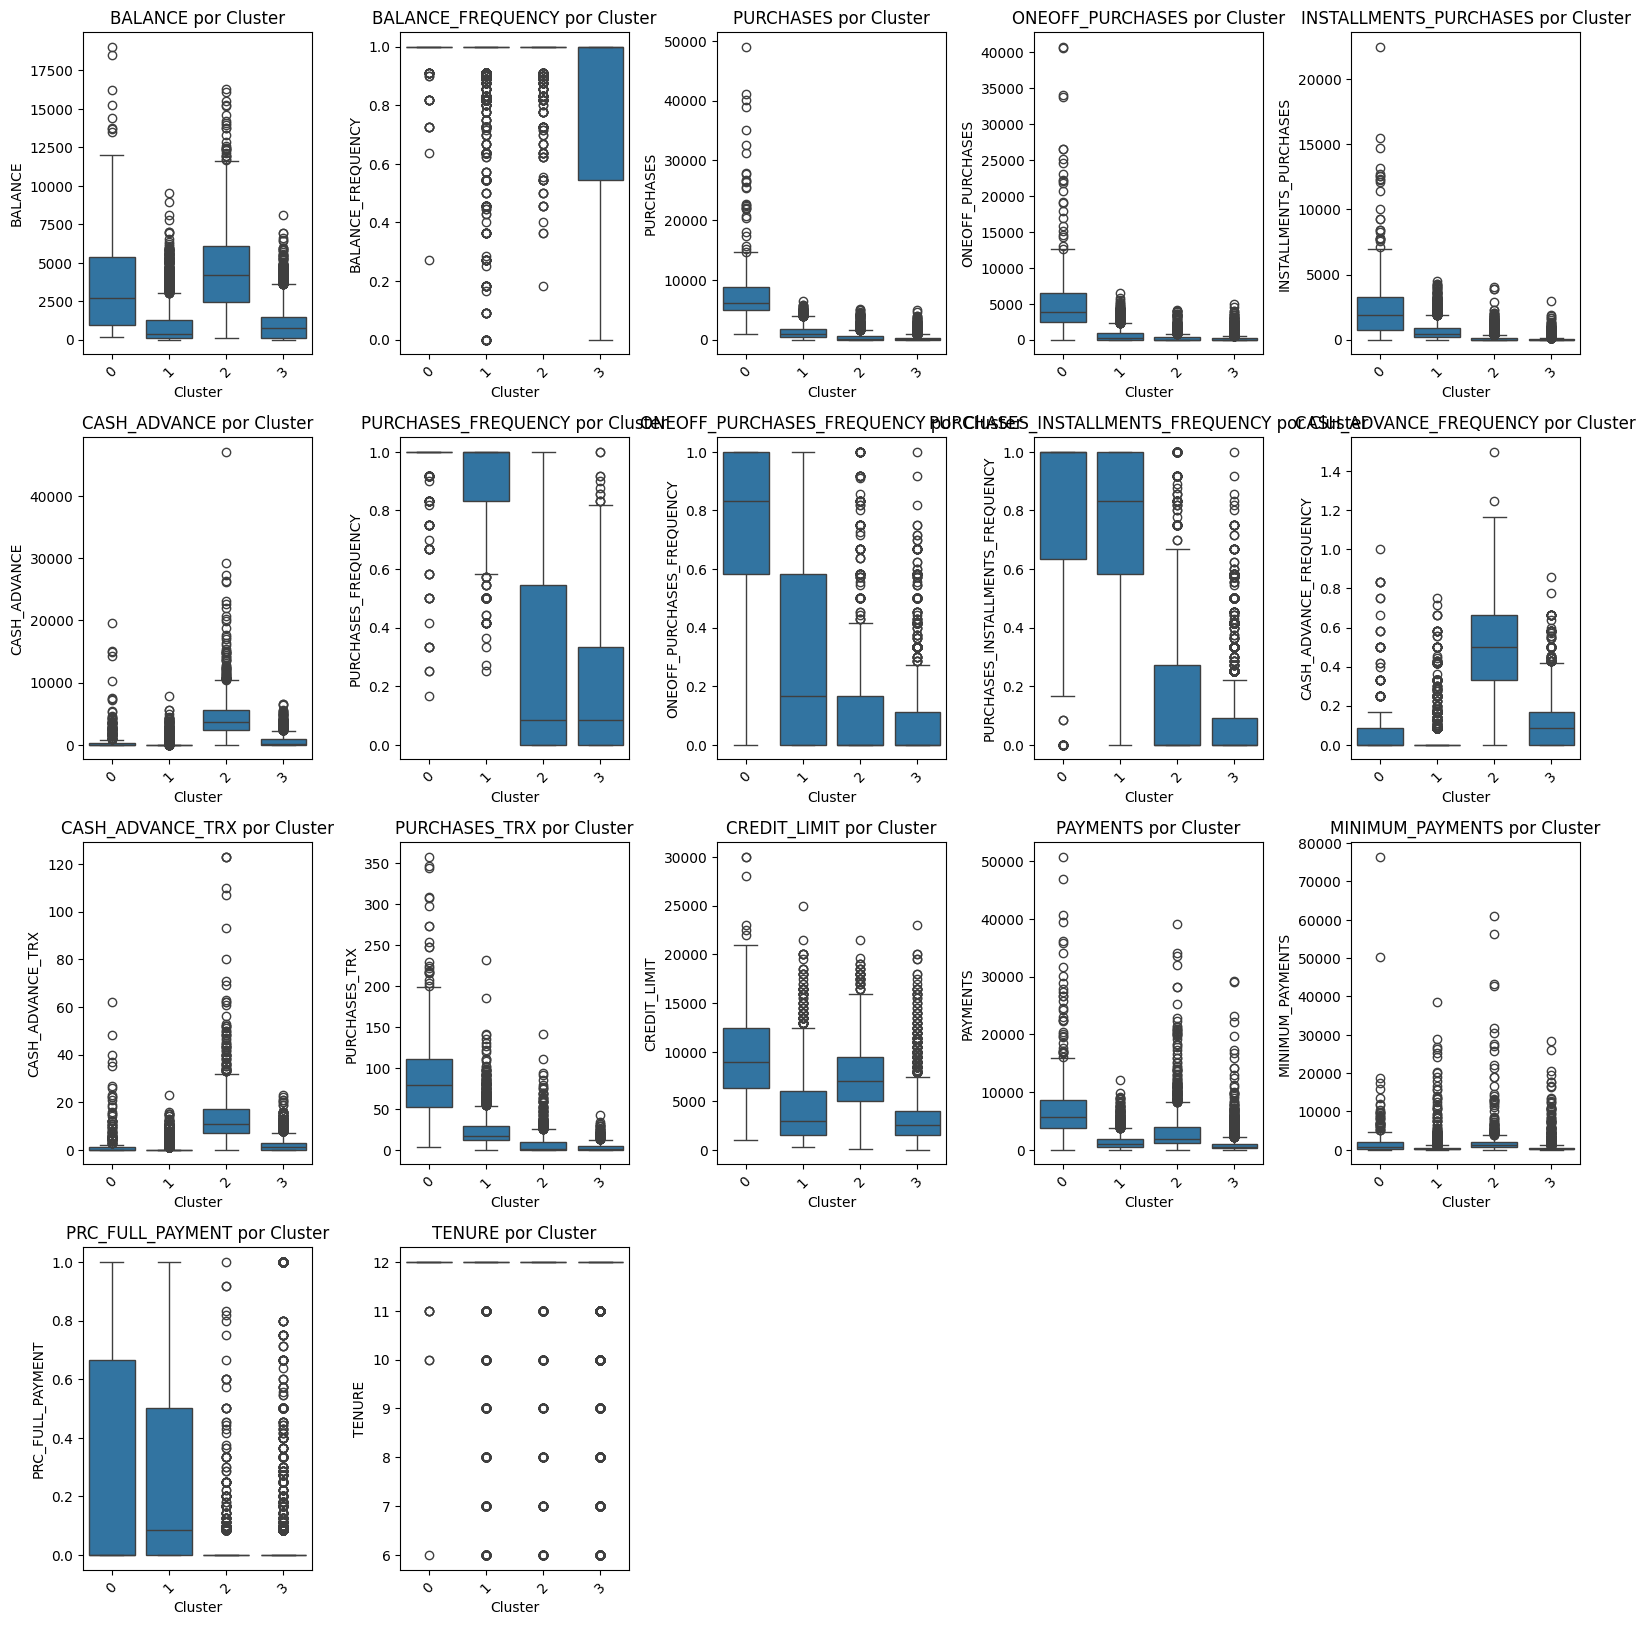

In [ ]:
# Análisis de distribuciones por cluster
def plot_cluster_distributions(data, labels, model_name):
    """
    Función para crear boxplots de las distribuciones de variables por cluster
    """
    # Crear un DataFrame con los datos originales y las etiquetas
    df_with_clusters = pd.DataFrame(data, columns=df.columns)
    df_with_clusters['Cluster'] = labels

    # Crear subplots para cada variable
    n_vars = len(df.columns)
    n_rows = (n_vars + 2) // 3  # Redondear hacia arriba para obtener suficientes filas

    plt.figure(figsize=(16, 4 * n_rows))

    for i, column in enumerate(df.columns, 1):
        plt.subplot(n_rows, 5, i)
        sns.boxplot(data=df_with_clusters, x='Cluster', y=column)
        plt.title(f'{column} por Cluster')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Distribuciones para K-means
plot_cluster_distributions(
    scaler.inverse_transform(df_scaled),
    kmeans_labels,
    'K-means'
)

La imagen muestra un conjunto de gráficos de caja (boxplots) que representan la distribución de diferentes variables financieras para cada uno de los 4 clusters identificados previamente mediante el algoritmo K-means. Cada gráfico muestra una variable específica (BALANCE, PURCHASES, CASH_ADVANCE, etc.) distribuida entre los 4 clusters (0, 1, 2 y 3). Los boxplots permiten visualizar la mediana, cuartiles y valores atípicos de cada variable para cada cluster.

**Descripción de los clusters**

- Cluster 0

  - Alto BALANCE: Mantiene saldos elevados
  - BALANCE_FREQUENCY moderada: Actualización de saldos periódica
  - PURCHASES altos: Nivel de compras significativo
  - PRC_FULL_PAYMENT alto: Tiende a pagar saldos completos
  - CREDIT_LIMIT elevado: Disfruta de límites de crédito mayores
  - PAYMENTS elevados: Realiza pagos de cuantías importantes

- Cluster 1

  - BALANCE_FREQUENCY muy alta: Actualización de saldos muy frecuente
  - PURCHASES_FREQUENCY alta: Utiliza la tarjeta con mucha frecuencia
  - ONEOFF_PURCHASES_FREQUENCY elevada: Realiza compras únicas frecuentemente
  - PURCHASES_INSTALLMENTS_FREQUENCY alta: También usa frecuentemente compras a plazos
  - BALANCE bajo: A pesar de uso frecuente, mantiene saldos bajos
  - PRC_FULL_PAYMENT moderado: Paga una proporción significativa del saldo

- Cluster 2

  - BALANCE medio-alto: Mantiene saldos considerables
  - CASH_ADVANCE moderado-alto: Utilizan adelantos en efectivo
  - CASH_ADVANCE_TRX elevado: Mayor número de transacciones de adelantos
  - CASH_ADVANCE_FREQUENCY media: Frecuencia moderada de adelantos
  - PRC_FULL_PAYMENT bajo: Rara vez pagan el saldo completo

- Cluster 3

  - Valores bajos en casi todas las métricas: Bajo uso general de la tarjeta
  - MINIMUM_PAYMENTS altos: Cuando usan la tarjeta, tienden a pagar solo el mínimo
  - PRC_FULL_PAYMENT muy bajo: Casi nunca pagan el saldo completo
  - BALANCE bajo: A pesar de pagar mínimos, mantienen saldos bajos (sugiere poco uso)

**Insights relevantes**

- Cluster 0 - "Usuarios premium/alto valor": Clientes con alto poder adquisitivo que realizan compras importantes, tienen límites elevados y suelen pagar sus saldos completos. Son rentables por volumen y comisiones a comercios, no por intereses.
- Cluster 1 - "Usuarios transaccionales frecuentes": Utilizan la tarjeta constantemente para todo tipo de compras (únicas y a plazos), pero mantienen saldos bajos, pagando una buena proporción de su deuda regularmente. Su rentabilidad viene principalmente de las comisiones a comercios.
- Cluster 2 - "Usuarios de financiación/revolventes": Clientes que utilizan significativamente adelantos en efectivo y mantienen saldos considerables sin pagar completamente. Son altamente rentables por los intereses generados.
- Cluster 3 - "Usuarios inactivos/ocasionales con tendencia al mínimo": Uso muy limitado de la tarjeta, pero cuando la usan tienden a pagar solo el mínimo. Podrían ser clientes nuevos, de bajo ingreso o que usan esta tarjeta como secundaria.

- TENURE similar en todos los clusters: Interesantemente, la antigüedad de los clientes (TENURE) no muestra diferencias significativas entre clusters, indicando que estos comportamientos no están determinados por el tiempo como cliente.

**Oportunidades estratégicas**

- Para el Cluster 0: Ofrecer productos premium adicionales, aumentar límites, programas de fidelización basados en volumen.
- Para el Cluster 1: Diseñar incentivos para aumentar el ticket medio, cashback o puntos por uso frecuente.
- Para el Cluster 2: Oportunidades de consolidación de deuda, préstamos personales, programas de educación financiera.
- Para el Cluster 3: Campañas de activación, incentivos por uso, posibles refinanciaciones para los que pagan mínimos.
- Gestión de riesgo diferenciada: El Cluster 2 representa el mayor riesgo crediticio potencial debido a su uso de adelantos y baja tasa de pago completo, mientras que el Cluster 0 representa el menor riesgo a pesar de sus altos saldos.

### **5.2. Clustering con DBSCAN**

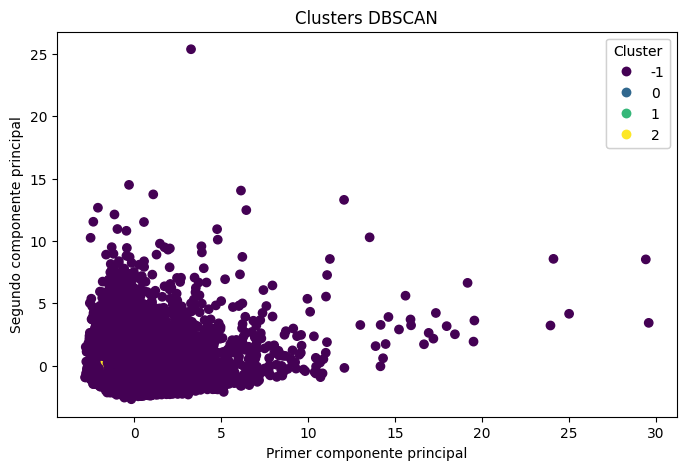

In [ ]:
# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=30)
dbscan_labels = dbscan.fit_predict(df_pca_reduced)

# Visualización utilizando los 2 primeros componentes principales
plt.figure(figsize=(8, 5))
scatter = plt.scatter(df_pca_reduced[:, 0], df_pca_reduced[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('Clusters DBSCAN')
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
legend1 = plt.legend(handles=scatter.legend_elements()[0], labels=list(np.unique(dbscan_labels)), title="Cluster")
plt.gca().add_artist(legend1)
plt.show()

La imagen muestra un gráfico de dispersión titulado "Clusters DBSCAN" que representa datos en un espacio bidimensional definido por los dos primeros componentes principales. El eje X representa el "Primer componente principal". El eje Y representa el "Segundo componente principal". Los puntos están clasificados en 4 clusters, según la leyenda:

- Cluster -1: puntos púrpura (que ocupan casi todo el gráfico)
- Cluster 0: puntos azul oscuro (aparentemente no visibles o muy escasos)
- Cluster 1: puntos verde (aparentemente no visibles o muy escasos)
- Cluster 2: puntos amarillo (aparentemente no visibles o muy escasos)

**Insights relevantes**

- Dominancia de puntos de ruido: La característica más destacable es que casi todos los puntos están etiquetados como Cluster -1 (púrpura), que en DBSCAN representa puntos de ruido que no pertenecen a ningún cluster. Esto sugiere que el algoritmo DBSCAN no ha sido capaz de identificar una estructura de clusters clara en estos datos con los parámetros utilizados.
- Contraste con K-means: Este resultado contrasta fuertemente con el análisis de K-means visto anteriormente, donde se identificaron 4 clusters bien definidos.

- Posibles causas del resultado:

  - Parámetros inadecuados: El epsilon (radio de vecindad) o min_samples (número mínimo de puntos para formar un cluster) podrían estar mal calibrados
  - Datos no adecuados para DBSCAN: Los clusters financieros podrían no estar definidos por densidad sino por otras características
  - Dimensionalidad reducida: Al proyectar en solo dos componentes principales, se podría estar perdiendo información crucial para la formación de clusters por densidad

- Distribución de los datos: A pesar de la falta de clusters, podemos observar que la mayoría de los puntos se concentran en la parte inferior izquierda del gráfico, con algunos puntos dispersos hacia la derecha y hacia arriba, lo que coincide con la distribución vista en el gráfico de K-means.

**Implicaciones para el análisis financiero**

- Reconsideración del enfoque de clustering: Estos resultados sugieren que DBSCAN podría no ser el algoritmo más adecuado para este conjunto específico de datos financieros, y que K-means ofrece una segmentación más útil desde una perspectiva de negocio.
- Valor de los valores atípicos: Los puntos considerados como "ruido" por DBSCAN podrían representar clientes con comportamientos financieros genuinamente únicos o inusuales, potencialmente de alto valor o alto riesgo.
- Necesidad de ajuste de parámetros: Si se desea utilizar DBSCAN para este análisis, sería necesario experimentar con diferentes valores de epsilon y min_samples para encontrar la configuración óptima.
- Enfoque híbrido potencial: Se podría considerar un enfoque de dos etapas: primero usar DBSCAN para identificar y posiblemente excluir valores atípicos extremos, y luego aplicar K-means al resto de los datos para obtener una segmentación más robusta.

In [ ]:
# Visualización utilizando los 3 primeros componentes principales
visualize_3d(df_pca_reduced, dbscan_labels)

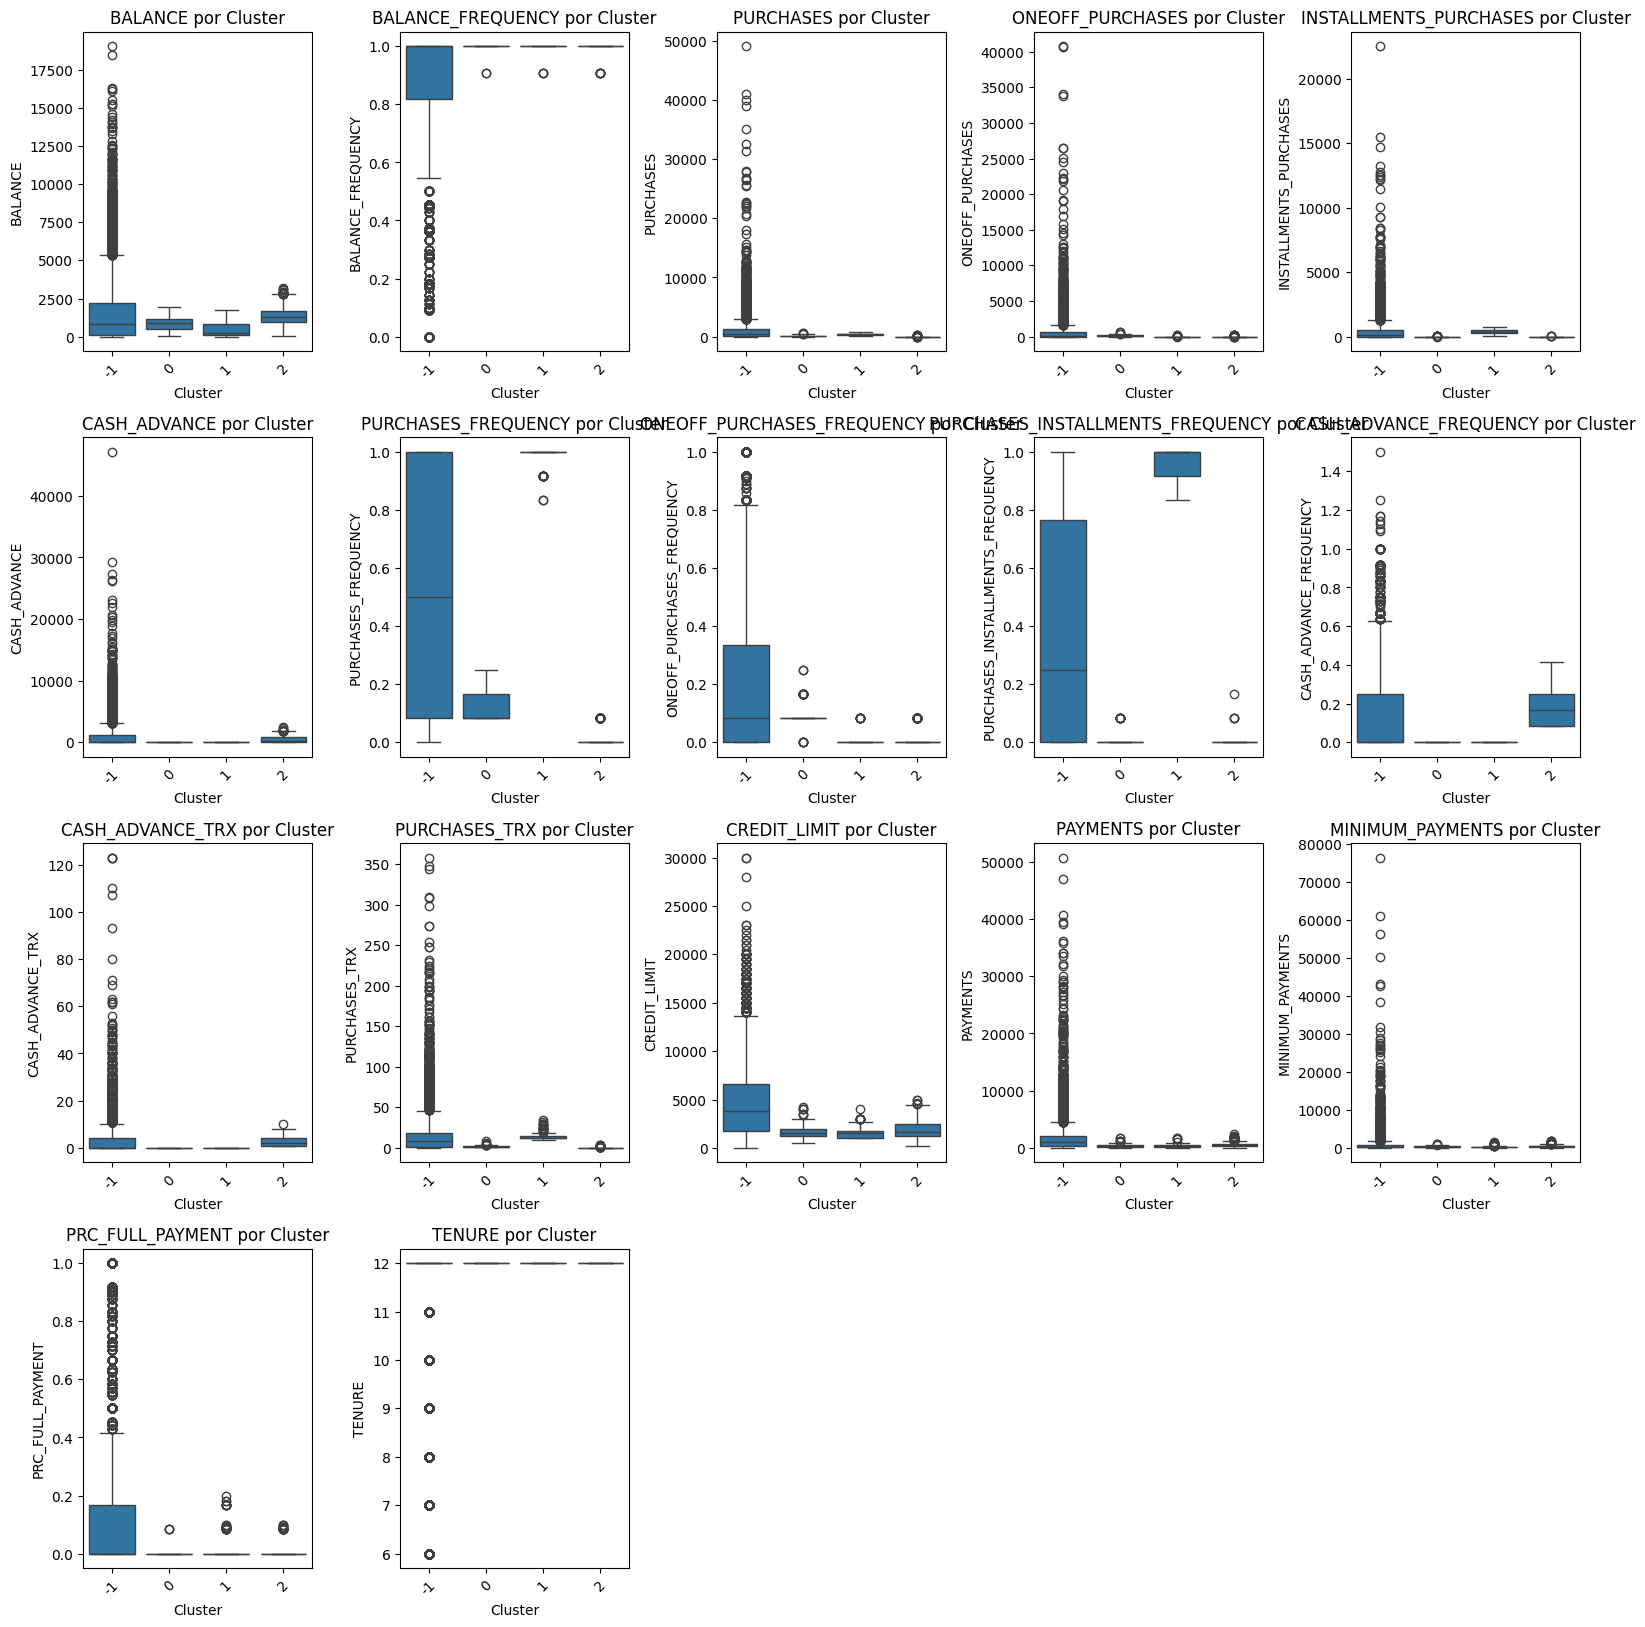

In [ ]:
# Distribuciones para DBSCAN
plot_cluster_distributions(
    scaler.inverse_transform(df_scaled),
    dbscan_labels,
    'DBSCAN'
)

La imagen muestra un conjunto de gráficos de caja (boxplots) que representan la distribución de diferentes variables financieras para cada uno de los clusters identificados mediante el algoritmo DBSCAN. A diferencia del análisis K-means anterior, esta segmentación muestra una distribución muy diferente de los datos.

**Características de los clusters**

- Cluster -1 (puntos de ruido):

  - Contiene la gran mayoría de los datos: La mayor parte de las observaciones han sido clasificadas como ruido
  - Alta variabilidad: Muestra rangos amplios en casi todas las variables
  - Valores extremos: Contiene prácticamente todos los valores atípicos y extremos de cada variable
  - PRC_FULL_PAYMENT diverso: Incluye tanto clientes que pagan completamente como parcialmente

- Cluster 0:

  - BALANCE_FREQUENCY alta: Uso muy frecuente de la tarjeta
  - PURCHASES_FREQUENCY moderada: Realizan compras con cierta regularidad
  - Valores medios-bajos: En general, muestran valores moderados o bajos en la mayoría de variables monetarias

- Clusters 1 y 2:

  - Tamaño reducido: Contienen muy pocas observaciones
  - Comportamiento homogéneo: Muestran muy poca variabilidad interna
  - PURCHASES_INSTALLMENTS_FREQUENCY: El cluster 1 muestra una frecuencia ligeramente mayor en compras a plazos

**Insights relevantes**

- Diferencia fundamental con K-means: Mientras K-means forzó la división de todos los datos en 4 grupos relativamente equilibrados, DBSCAN ha identificado que la mayoría de los datos no forman clusters naturales basados en densidad, clasificándolos como ruido.

- La clasificación de DBSCAN sugiere que la mayoría de los clientes tienen comportamientos financieros altamente individualizados que no se agrupan naturalmente en patrones claros. Los pocos clientes asignados a clusters específicos representan comportamientos verdaderamente similares y cohesivos.

**Oportunidades específicas**

- Para el cluster -1: Implementación de algoritmos de personalización avanzada o machine learning para abordar la alta variabilidad.

- Para clusters definidos: Creación de productos financieros altamente específicos diseñados para estos pequeños grupos con comportamientos muy definidos.

**Consideraciones metodológicas**

- La gran cantidad de puntos clasificados como ruido podría indicar que los parámetros de DBSCAN (epsilon y min_samples) necesitan ajuste.
- También sugiere que los comportamientos financieros de los clientes podrían estar mejor representados por modelos más complejos o técnicas de clustering jerárquico.

### **5.3. Clustering con Agrupamiento Jerárquico**

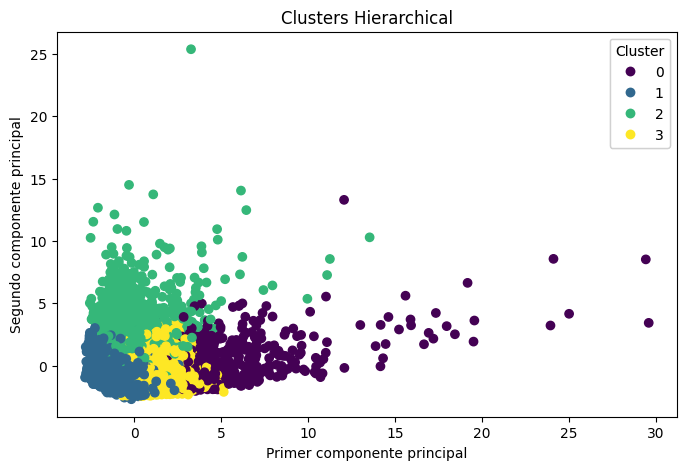

In [ ]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(df_pca_reduced)

# Visualización utilizando los 2 primeros componentes principales
plt.figure(figsize=(8, 5))
scatter = plt.scatter(df_pca_reduced[:, 0], df_pca_reduced[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Clusters Hierarchical')
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
legend1 = plt.legend(handles=scatter.legend_elements()[0], labels=list(np.unique(hierarchical_labels)), title="Cluster")
plt.gca().add_artist(legend1)
plt.show()

La imagen muestra la distribución de datos en un espacio bidimensional definido por los dos primeros componentes principales. El eje X representa el "Primer componente principal". El eje Y representa el "Segundo componente principal"
Los datos están clasificados en 4 clusters (0, 1, 2 y 3).

**Insights relevantes**

- Similitud con K-means: La distribución de clusters en este gráfico es notablemente similar a la observada en el análisis con K-means, lo que sugiere que ambos métodos han identificado patrones similares en los datos, validando la existencia de estos grupos.

- Características de los clusters:

  - Cluster 0 (púrpura): Se extiende hacia la derecha con valores altos en el primer componente principal. Muestra mayor dispersión.
  - Cluster 1 (azul): Concentrado en la parte inferior izquierda, con valores bajos en el segundo componente.
  - Cluster 2 (verde): Ubicado principalmente en la parte superior, con valores positivos en el segundo componente.
  - Cluster 3 (amarillo): Situado en la zona central-inferior, entre los clusters 1 y 0.

- Ventajas del clustering jerárquico: A diferencia de DBSCAN, el clustering jerárquico ha logrado asignar todos los puntos a clusters específicos, similar a K-means, pero potencialmente con límites más naturales entre grupos al no imponer restricciones de forma circular/esférica.

- K-means y el clustering jerárquico proporcionan resultados similares y útiles para la segmentación de clientes. DBSCAN resultó demasiado restrictivo para estos datos, clasificando la mayoría como ruido. El clustering jerárquico podría ofrecer ventajas al capturar la estructura anidada o multinivel en los comportamientos financieros.

- La consistencia entre K-means y clustering jerárquico refuerza la confianza en la segmentación obtenida. Esta segmentación robusta proporciona una base sólida para estrategias de marketing, gestión de riesgos y desarrollo de productos específicos. La distinción clara entre los clusters permitiría personalizar las comunicaciones y ofertas para cada segmento.

In [ ]:
# Visualización utilizando los 3 primeros componentes principales
visualize_3d(df_pca_reduced, hierarchical_labels)

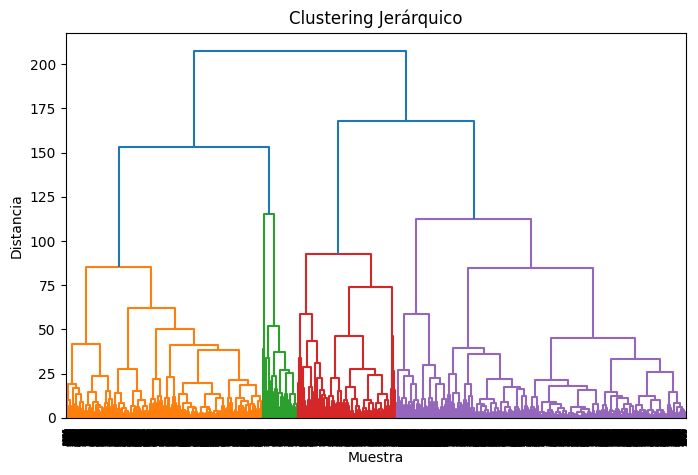

In [ ]:
# Dendrograma
plt.figure(figsize=(8, 5))
linkage_matrix = linkage(df_pca_reduced, method='ward')
dendrogram(linkage_matrix)
plt.title('Clustering Jerárquico')
plt.xlabel('Muestra')
plt.ylabel('Distancia')
plt.show()

La imagen muestra una representación gráfica de los resultados de un análisis de clustering jerárquico aglomerativo. El eje X representa las diferentes muestras (cada cliente individual del conjunto de datos). El eje Y representa la "Distancia" o disimilitud entre clusters. Las líneas verticales representan muestras individuales, mientras que las horizontales representan las fusiones entre clusters. Los colores diferentes (naranja, verde, rojo y púrpura) indican los 4 clusters principales identificados. La altura de las uniones horizontales indica la distancia a la que los clusters se fusionan.

**Insights relevantes**

- Estructura jerárquica clara: El dendrograma muestra una estructura de agrupamiento natural con 4 clusters principales bien definidos, lo que valida la elección de k=4 que se había identificado tanto con el método del codo como con K-means.
- Cohesión interna vs. separación externa: Las distancias relativamente cortas dentro de cada cluster (líneas más bajas) y las distancias mayores entre clusters (líneas más altas) indican que los 4 grupos identificados son internamente cohesivos y externamente diferenciados.
- Estructura de dos niveles: A un nivel superior (distancia aproximada de 150-200), se observa que los clusters se agrupan en dos "super-clusters" principales, lo que sugiere que existen dos categorías fundamentales de comportamiento financiero, cada una con dos subcategorías.
- Subclusters: Dentro de cada cluster principal, especialmente en el púrpura y naranja, se pueden observar subclusters adicionales, lo que indica una estructura jerárquica más compleja dentro de los grupos principales.

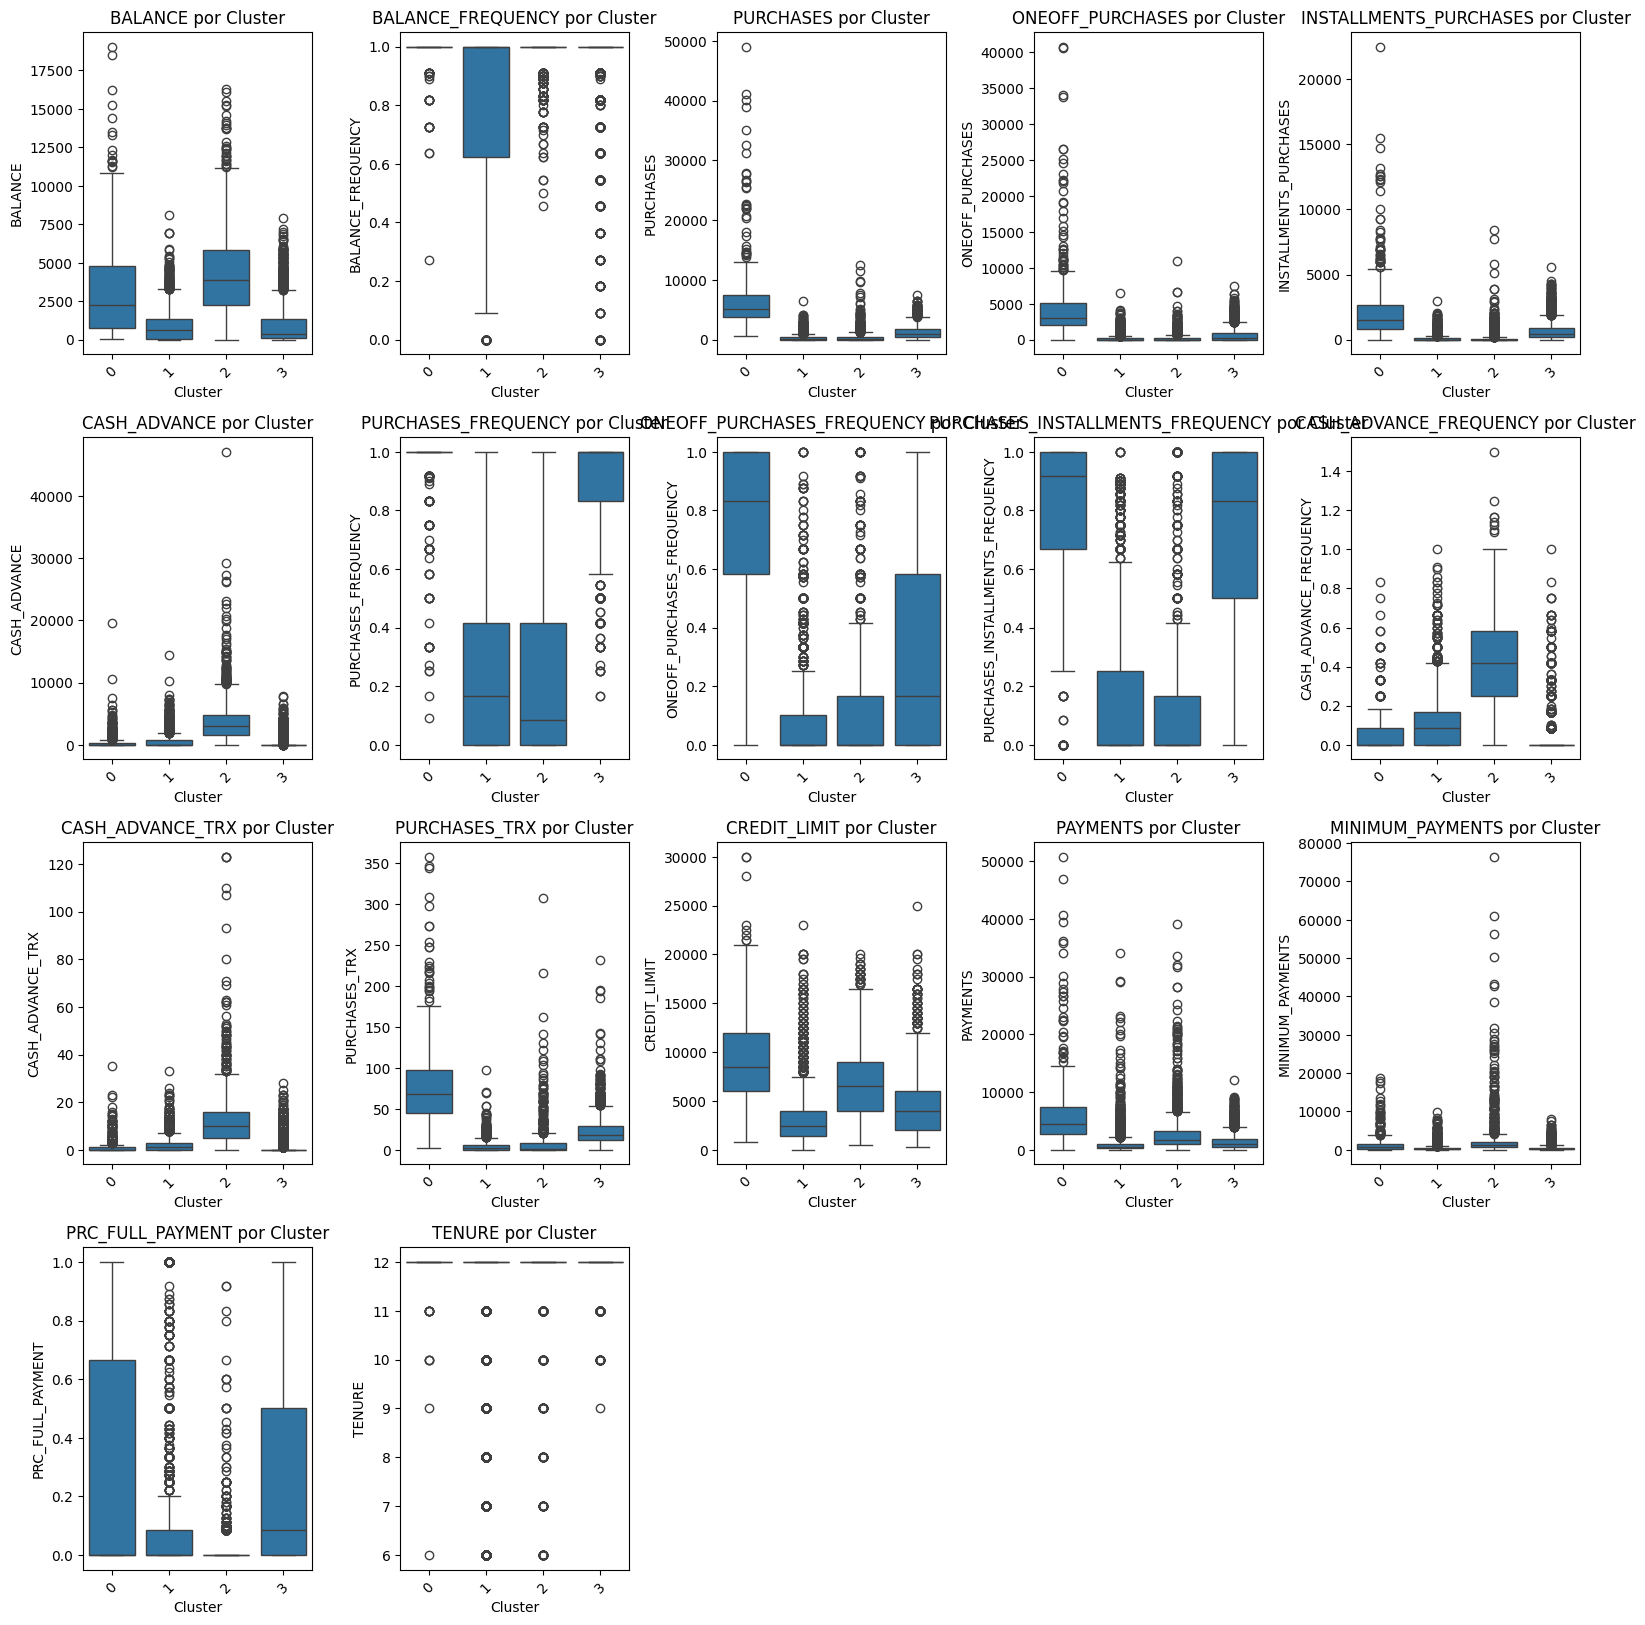

In [ ]:
# Distribuciones para Hierarchical Clustering
plot_cluster_distributions(
    scaler.inverse_transform(df_scaled),
    hierarchical_labels,
    'Hierarchical Clustering'
)

La imagen muestra una serie de gráficos de caja (boxplots) que representan la distribución de variables financieras para cada uno de los 4 clusters identificados mediante clustering jerárquico.

**Perfiles de los Clusters**

- Cluster 0

  - BALANCE medio-alto: Mantienen saldos considerables
  - PURCHASES relativamente altos: Volumen significativo de compras
  - PURCHASES_TRX elevado: Alto número de transacciones de compra
  - CREDIT_LIMIT elevado: Disfrutan de límites de crédito mayores
  - PAYMENTS relativamente altos: Realizan pagos de cuantías importantes
  - PRC_FULL_PAYMENT alto: Tendencia a pagar el saldo completo

- Cluster 1

  - BALANCE_FREQUENCY muy alta: Actualización de saldos muy frecuente
  - BALANCE bajo: Mantienen saldos reducidos
  - ONEOFF_PURCHASES_FREQUENCY baja: Pocas compras únicas
  - PURCHASES_FREQUENCY baja: Frecuencia de uso general baja
  - PURCHASES_INSTALLMENTS_FREQUENCY moderada: Uso ocasional de compras a plazos

- Cluster 2

  - BALANCE medio: Saldos moderados
  - CASH_ADVANCE significativo: Utilizan adelantos en efectivo
  - CASH_ADVANCE_TRX elevado: Mayor número de transacciones de adelantos
  - CASH_ADVANCE_FREQUENCY media: Frecuencia moderada de adelantos
  - PRC_FULL_PAYMENT muy bajo: Rara vez pagan el saldo completo

- Cluster 3

  - BALANCE bajo-moderado: Saldos moderados a bajos
  - ONEOFF_PURCHASES_FREQUENCY alta: Alta frecuencia de compras únicas
  - PURCHASES_INSTALLMENTS_FREQUENCY baja: Poco uso de compras a plazos
  - PRC_FULL_PAYMENT moderado-alto: Tendencia a pagar una buena proporción del saldo

**Insights relevantes**

- Cluster 0 - "Compradores premium": Clientes con alto poder adquisitivo que realizan compras importantes y frecuentes, tienen límites elevados y suelen pagar sus saldos completos. Son rentables principalmente por volumen de transacciones y comisiones a comercios.
- Cluster 1 - "Usuarios cautelosos": Clientes que actualizan frecuentemente su saldo pero mantienen montos bajos y tienen baja frecuencia de compras. Posiblemente usuarios que monitorean activamente sus finanzas pero son selectivos con sus gastos.
- Cluster 2 - "Usuarios de financiamiento": Clientes que recurren significativamente a adelantos en efectivo y rara vez pagan su saldo completo. Generan ingresos principalmente a través de intereses y comisiones por adelantos.
- Cluster 3 - "Compradores puntuales": Realizan principalmente compras únicas (no a plazos) con frecuencia relativamente alta, y pagan una proporción significativa de su saldo. Usuarios transaccionales que evitan la acumulación de deuda.

- Consistencia con análisis previos: Los perfiles identificados mediante clustering jerárquico son coherentes con los identificados por K-means, lo que refuerza la validez de esta segmentación.

**Estrategias de negocio específicas**

- Cluster 0: Alto valor por volumen, bajo riesgo. Programas de lealtad premium, aumento de límites, beneficios en comercios de alta gama.
- Cluster 2: Alto valor por ingresos financieros, mayor riesgo. Incentivos para incrementar frecuencia de uso, educación sobre beneficios de la tarjeta.
- Cluster 3: Valor moderado, riesgo bajo. Ofertas de consolidación de deuda, programas de gestión financiera, seguros asociados a préstamos.
- Cluster 1: Valor actual bajo, potencial por desarrollar. Cashback en compras únicas, beneficios inmediatos versus programas de acumulación.

## **6. Análisis de Resultados y Comparación de Modelos**

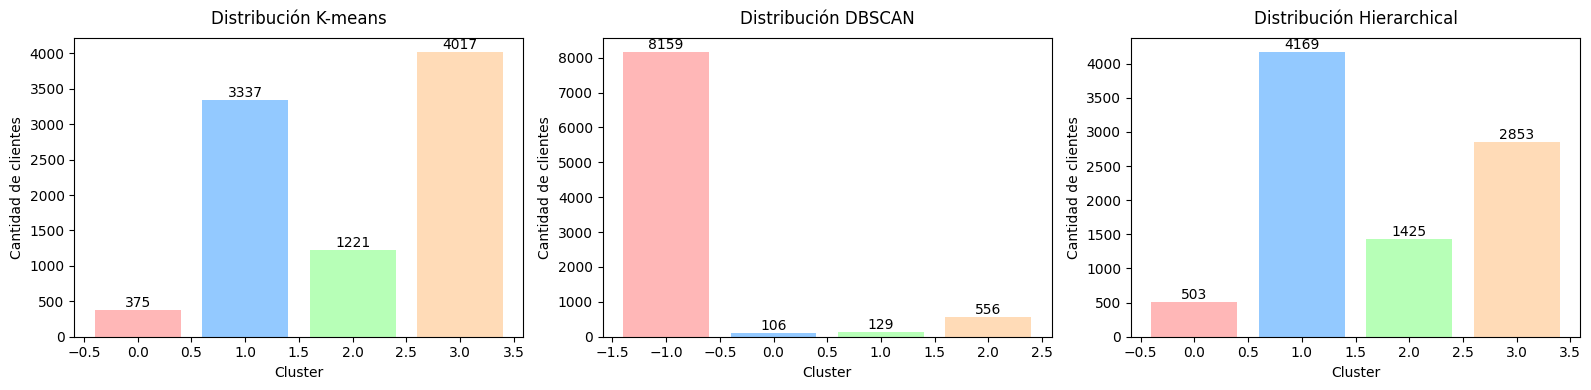

In [ ]:
# Comparación de distribuciones de clusters por modelo
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Colores para las barras
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC']

# K-means
kmeans_counts = pd.Series(kmeans_labels).value_counts().sort_index()
axes[0].bar(kmeans_counts.index, kmeans_counts.values,
            color=colors[:len(kmeans_counts)], alpha=0.7)
axes[0].set_title('Distribución K-means', pad=10)
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Cantidad de clientes')
# Añadir etiquetas de valor sobre cada barra
for i, v in enumerate(kmeans_counts.values):
    axes[0].text(i, v, str(v), ha='center', va='bottom')

# DBSCAN
dbscan_counts = pd.Series(dbscan_labels).value_counts().sort_index()
axes[1].bar(dbscan_counts.index, dbscan_counts.values,
            color=colors[:len(dbscan_counts)], alpha=0.7)
axes[1].set_title('Distribución DBSCAN', pad=10)
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Cantidad de clientes')
# Añadir etiquetas de valor sobre cada barra
for i, v in zip(dbscan_counts.index, dbscan_counts.values):
    axes[1].text(i, v, str(v), ha='center', va='bottom')

# Hierarchical
hierarchical_counts = pd.Series(hierarchical_labels).value_counts().sort_index()
axes[2].bar(hierarchical_counts.index, hierarchical_counts.values,
            color=colors[:len(hierarchical_counts)], alpha=0.7)
axes[2].set_title('Distribución Hierarchical', pad=10)
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Cantidad de clientes')
# Añadir etiquetas de valor sobre cada barra
for i, v in enumerate(hierarchical_counts.values):
    axes[2].text(i, v, str(v), ha='center', va='bottom')

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

La imagen muestra tres gráficos de barras que representan la distribución de clientes entre los diferentes clusters generados por tres algoritmos distintos: K-means, DBSCAN y Clustering Jerárquico.

**Distribución K-means**

- Cluster 0: 375 clientes
- Cluster 1: 3337 clientes
- Cluster 2: 1221 clientes
- Cluster 3: 4017 clientes
- Total: 8950 clientes

**Distribución DBSCAN**

- Cluster -1 (ruido): 8159 clientes
- Cluster 0: 106 clientes
- Cluster 1: 129 clientes
- Cluster 2: 556 clientes
- Total: 8950 clientes

**Distribución Hierarchical**

- Cluster 0: 503 clientes
- Cluster 1: 4169 clientes
- Cluster 2: 1425 clientes
- Cluster 3: 2853 clientes
- Total: 8950 clientes

**Insights relevantes**

- Diferencias fundamentales entre algoritmos:

  - K-means: Distribución relativamente equilibrada con dos clusters dominantes (1 y 3)
  - DBSCAN: Clasificó el 91% de los clientes como ruido (-1), identificando solo unos pocos clusters pequeños pero de alta densidad
  - Clustering Jerárquico: Distribución más similar a K-means, pero con proporciones diferentes entre clusters

- Fortalezas y limitaciones evidenciadas:

  - K-means: Fuerza a todos los puntos a pertenecer a algún cluster, creando grupos de tamaño comparable, lo que facilita estrategias de marketing equilibradas
  - DBSCAN: Extremadamente selectivo, sugiere que la mayoría de los clientes tienen comportamientos financieros únicos que no forman agrupaciones naturales basadas en densidad
  - Clustering Jerárquico: Ofrece un balance entre la asignación completa de K-means y la selectividad de DBSCAN

- Implicaciones prácticas:

  - El cluster 1 de K-means (3337 clientes) parece corresponderse aproximadamente con el cluster 1 del Jerárquico (4169 clientes), sugiriendo un grupo robusto y consistente de clientes
  - El predominio abrumador del ruido en DBSCAN (8159 de 8950 clientes) confirma la heterogeneidad de los comportamientos financieros
  - El clustering jerárquico y K-means ofrecen segmentaciones más prácticas para implementación de estrategias comerciales

- Consideraciones estratégicas:

  - Para campañas de marketing masivas: los clusters más grandes (K-means 3 y Jerárquico 1) ofrecen el mayor alcance
  - Para ofertas altamente personalizadas: los pequeños clusters identificados por DBSCAN (0, 1, 2) representan grupos con comportamientos financieros excepcionalmente similares
  - Para un balance: el enfoque jerárquico proporciona una distribución que combina grupos grandes para eficiencia con suficiente diferenciación

- Consenso entre métodos:

  - El tamaño total de la muestra (8950 clientes) se mantiene constante en los tres métodos
  - Todos los métodos identifican al menos un grupo grande y varios más pequeños, aunque en proporciones muy diferentes
  - La diferencia radical de DBSCAN sugiere que la densidad no es el criterio más adecuado para agrupar estos datos financieros

Esta comparativa muestra que la elección del algoritmo de clustering tiene un impacto dramático en la segmentación resultante. Para aplicaciones prácticas en este conjunto de datos financieros, K-means o el clustering jerárquico parecen ofrecer segmentaciones más útiles, mientras que DBSCAN podría ser valioso para identificar nichos muy específicos de clientes con comportamientos excepcionalmente similares.